# Библиотеки

In [3]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import itertools

In [4]:
# !pip install cryptorandom permute arch

In [5]:
# ! pip install permutation_test

In [6]:
from statsmodels.stats.descriptivestats import sign_test
from permute.core import one_sample
from arch.bootstrap import IIDBootstrap

from permutation_test import permutationtest

# Код генерации выборки

In [7]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code%(2**32-1))
    ars = np.random.RandomState(code%(2**16-1))
    if rs.randint(low=0, high=2) == 0:
        while True:
            data = rs.randn(20)
            if st.shapiro(data)[1] > 0.2 or ars.binomial(100, 0.05) > 10:
                break
    else:
        while True:
            data = np.concatenate([rs.randn(6) - 2, rs.randn(6) + 2])
            if st.shapiro(data)[1] < 0.01 or ars.binomial(100, 0.05) > 10:
                break
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [8]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task
#  yurchenko.aa@phystech.edu

Enter your mail: yurchenko.aa@phystech.edu


{'mail': 'yurchenko.aa@phystech.edu',
 'id': 1779776968,
 'data': array([-0.10807709,  0.07356522, -0.739063  , -0.64162977,  0.1828638 ,
         0.59814749,  0.92453191, -2.03833198, -0.17707878,  0.43352974,
         1.33710666,  0.01993165, -0.6180032 , -0.81091398, -0.20807483,
        -0.31187699, -0.18038264,  0.58779878,  1.11981533,  0.5101736 ])}

# Работа с выборкой

In [10]:
data = task['data']
print(data.shape)

(20,)


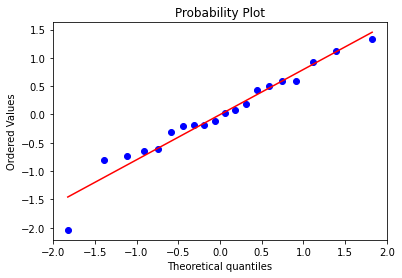

In [12]:
import pylab
st.probplot(data, dist="norm", plot=pylab)
pylab.show()

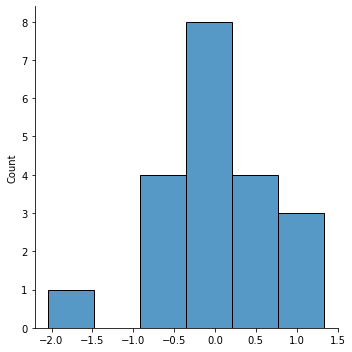

In [14]:
import seaborn as sns
_ = sns.displot(data)

In [15]:
print('p_value = {}'.format(st.shapiro(data)[1]))

p_value = 0.5782486200332642


$p \_ value > 0.05 ⇒ $ не отклоняем гипотезу о нормальности, можно применять критерий Стьюдента

In [16]:
st.normaltest(data) # альтернативный вариант проверки на нормальность

NormaltestResult(statistic=3.0467386856686964, pvalue=0.21797621169018938)

In [17]:
st.wilcoxon(data) # критерий знаковых рангов Уилкоксона

WilcoxonResult(statistic=105.0, pvalue=1.0)

In [18]:
st.ttest_1samp(data, 0) 

Ttest_1sampResult(statistic=-0.013237594346488293, pvalue=0.9895762495131517)

In [19]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(data, mu0=0.0) # критерий знаков

(0.0, 1.0)

In [21]:
n = 2**data.shape[0] # число перестановок
n

1048576

In [22]:
t = (data - 0.5)
T = np.sum(t)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=data.shape[0]):
    count += 1
    stat = np.dot(t, v)
    if abs(stat) <= abs(T):
        good += 1
    
      
print('good_count =', good) # количество перестановок, когда статистика имеет значение меньшее или равное статистике для оригинальной выборки

good_count = 1040708


In [23]:
t = (data - 0.5)
T = np.sum(t)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=data.shape[0]):
    count += 1
    stat = np.dot(t, v)
    if stat <= T:
        good += 1
    
      
print('good_count =', good)

good_count = 3935


In [25]:
bs = IIDBootstrap(data) 
bound = list(map(lambda x: round(x[0], 2), bs.conf_int(np.mean, 10000, method='basic')))
print('left_bound = {}\nright_bound = {}'.format(*bound)) # левая и правая границы доверительного интервала для среднего выборки 

left_bound = -0.33
right_bound = 0.35


In [26]:
rs = np.random.RandomState(0) # бутстреп вручную

idx = rs.randint(low=0, high=data.shape[0], size=(10000, data.shape[0]))
results = []
for i in idx:
    sample = data[i]
    results.append(sample.mean())

np.percentile(results, [2.5, 97.5])

array([-0.34349848,  0.32343861])

In [ ]:
(1 - one_sample(data-0.5, alternative ='two-sided')[0]) * 1048576

In [ ]:
(1 - one_sample(data-0.5, alternative ='two-sided')[0]) * n

In [ ]:
(1 - one_sample(data, 0.5*np.ones_like(data), alternative='two-sided')[0]) * n

In [ ]:
n_hand = 1040708